<a href="https://colab.research.google.com/github/nikishkaaa/Predicting_Bank_Term_Deposit_Subscriptions/blob/main/Bank_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Dataset-UCI Machine learning

#### Problem Statement The "Bank Marketing Data Set" from the UCI Machine Learning Repository focuses on direct marketing campaigns (phone calls) conducted by a Portuguese bank. The objective is to classify whether a client will subscribe to a term deposit (target variable y). Detailed attribute descriptions can be found at the original UCI URL: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [66]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.linear_model import  LogisticRegression
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn import metrics

In [67]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [68]:
df = df[~df.duplicated()] #removing duplicate rows

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [70]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Check Target

<Axes: xlabel='y', ylabel='count'>

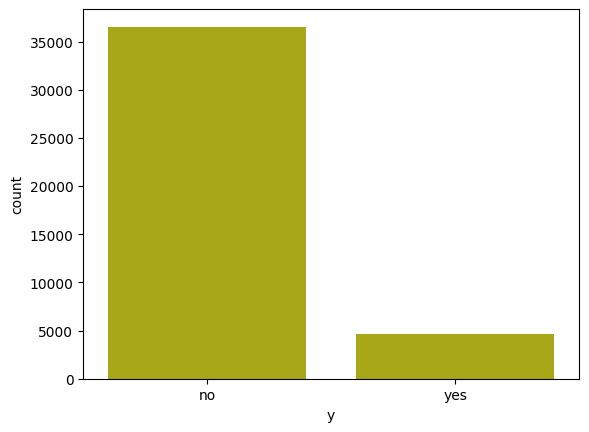

In [71]:
sns.countplot(data=df, x='y', color='y')

- target value imbalanced

## Handling categorical columns

In [72]:
cat_columns = df.drop('y', axis=1).select_dtypes(exclude='number').columns.tolist()
num_columns = df.select_dtypes(include='number').columns.tolist()

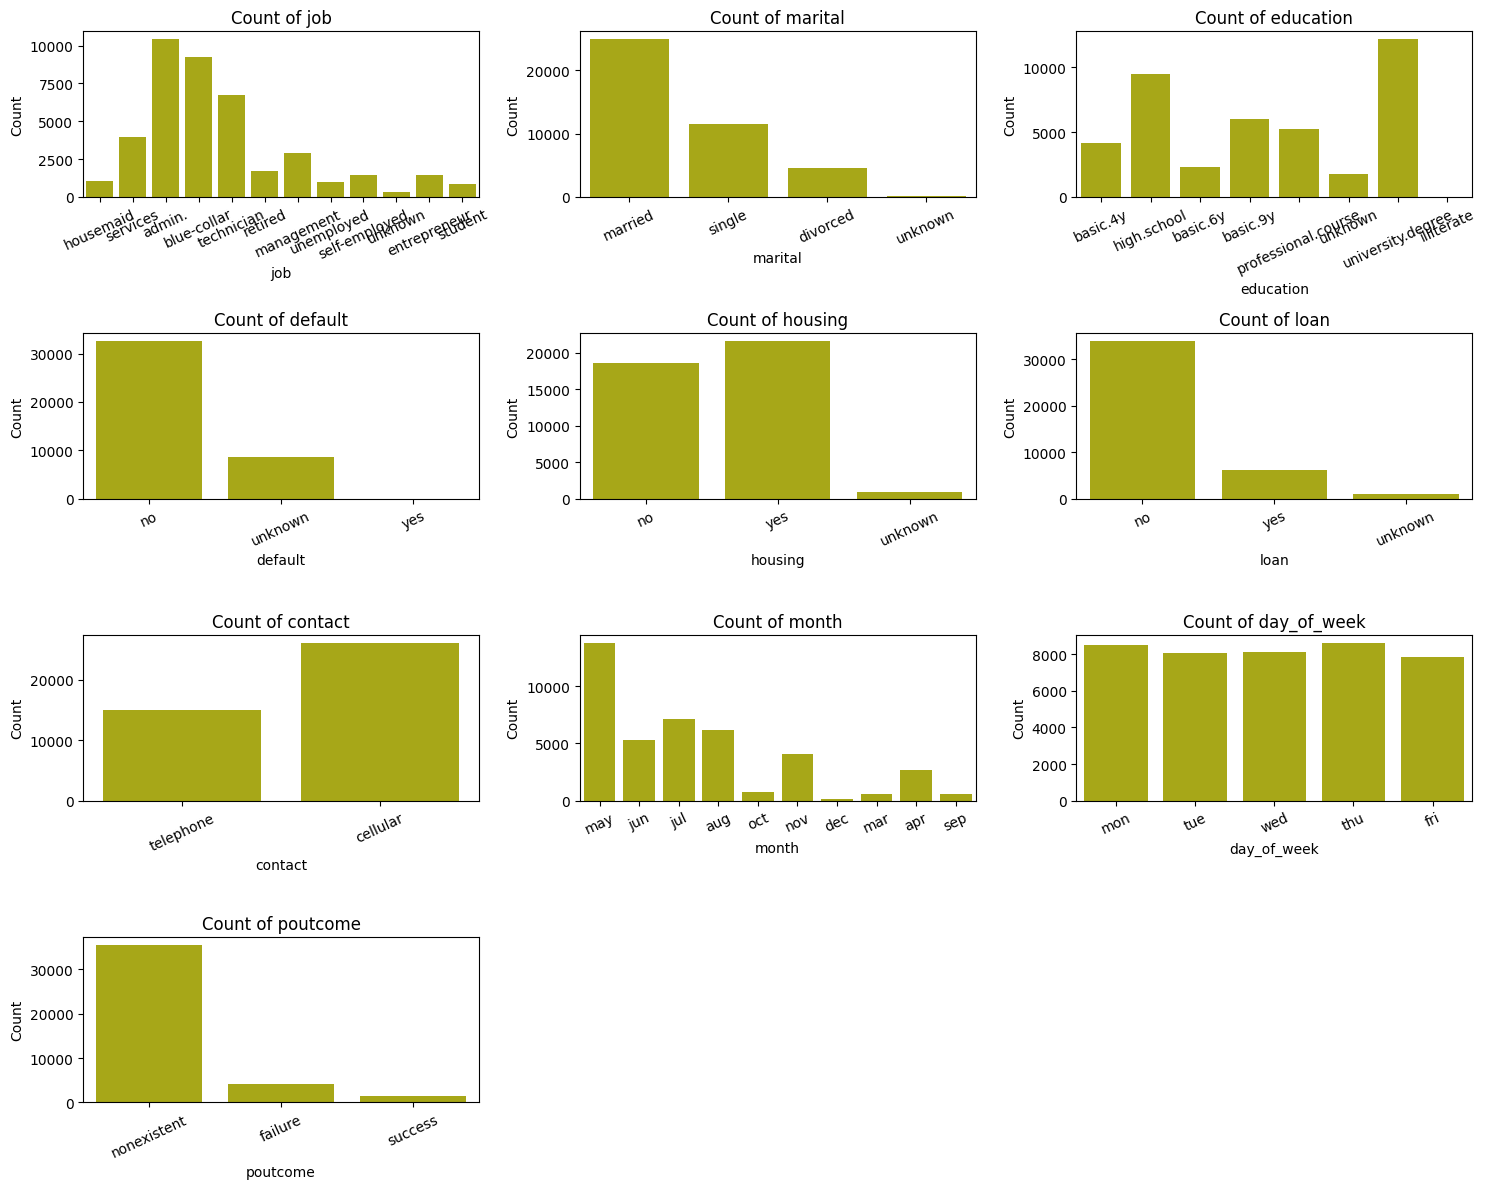

In [73]:
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))


axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color='y')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

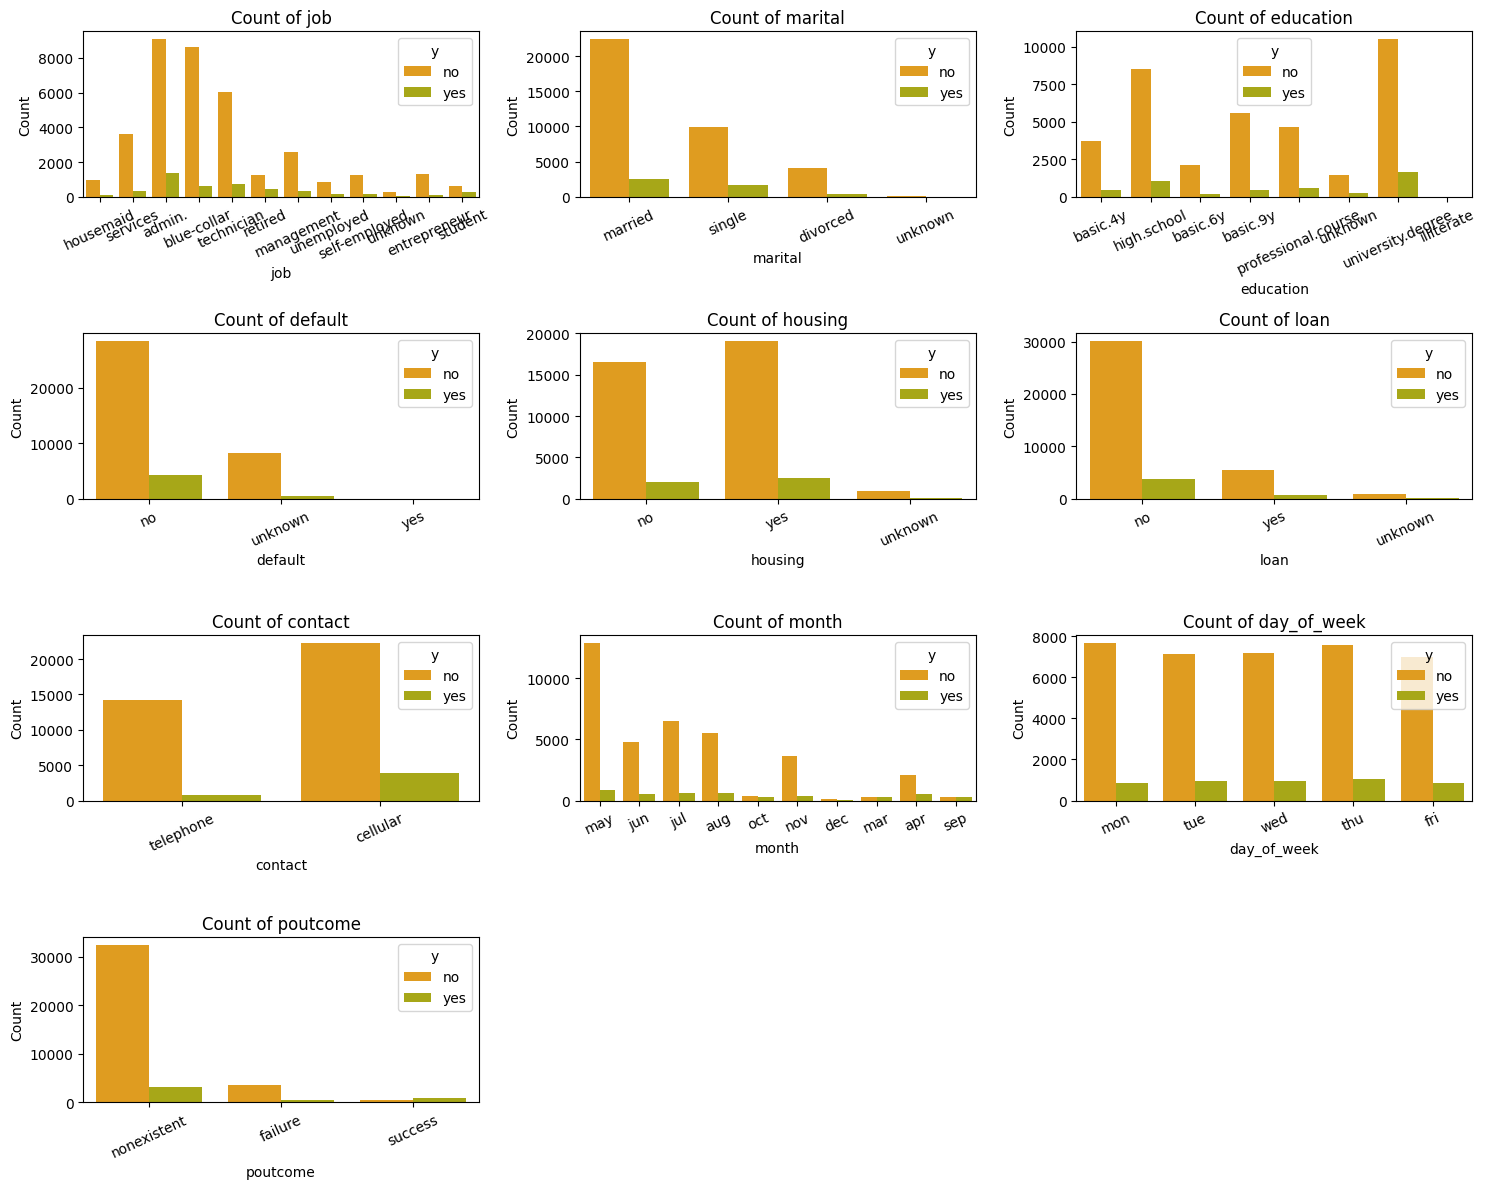

In [74]:
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

custom_palette = {
    'yes': 'y',  # Color for 'yes'
    'no': 'orange'  # Color for 'no'
}

axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue='y', palette=custom_palette)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [75]:
job_dict = {'admin.': 1,
            'blue-collar': 2,
            'technician': 3,
            'services': 4,
            'management': 5,
            'retired': 6,
            'entrepreneur': 7,
            'self-employed': 8,
            'housemaid': 9,
            'unemployed': 10,
            'student': 11,
            'unknown':0
             }

df.job = df.job.map(job_dict)

In [76]:
days_dict = {
            'mon': 1,
            'tue': 2,
            'fri': 5,
            'wed': 3,
            'thu': 4
             }

df.day_of_week = df.day_of_week.map(days_dict)

In [77]:
month_dict = {
            'apr': 3,
            'mar': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9,
            'oct': 10,
            'nov': 11,
            'dec':12
             }

df.month = df.month.map(month_dict)

In [78]:
housing_dict = {
            'no': 1,
            'yes': 2,
            'unknown': 0,
             }

df.housing = df.housing.map(housing_dict)

In [79]:
loan_dict = {
            'no': 1,
            'yes': 2,
            'unknown': 0,
             }

df.loan = df.loan.map(loan_dict)

In [80]:
default_dict = {
            'no': 1,
            'yes': 2,
            'unknown': 0,
             }

df.default = df.default.map(default_dict)

In [81]:
marital_dict = {
            'married': 1,
            'single': 2,
            'divorced': 3,
            'unknown':0
             }

df.marital = df.marital.map(marital_dict)

In [82]:
education_dict = {
            'basic.4y': 1,
            'basic.6y': 2,
            'basic.9y': 3,
            'high.school': 4,
            'university.degree': 5,
            'professional.course': 6,
            'illiterate': 7,
            'unknown':0
}
df.education = df.education.map(education_dict)

In [83]:
label = ['contact', 'poutcome', 'y']

for label in label:
  df[label] = LabelEncoder().fit_transform(df[label])

In [84]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,1,1,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,4,0,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,4,1,2,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,2,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,4,1,1,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,6,1,2,1,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,2,1,6,1,1,1,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,5,1,2,1,0,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,3,1,6,1,1,1,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [85]:
df[cat_columns] = df[cat_columns].replace(0, np.nan)

In [86]:
imputer = IterativeImputer(random_state=100, max_iter=50)
preds = imputer.fit_transform(df)
df = pd.DataFrame(preds, columns=df.columns)

## Train-Test split

In [87]:
X = df.drop('y', axis=1)
y = df['y']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaling Numeric Data

In [89]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

## Addressing Class Imbalance in the Dataset

### SMOTE

In [90]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Tomek Links

In [91]:
!pip install -U imbalanced-learn

In [92]:
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

In [93]:
y_train_tomek.value_counts()

,count
y,
0.0,28242
1.0,3711


### SMOTETomek

In [94]:
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

## Logistic Regression

In [122]:
# Computes ROC AUC
def compute_auroc(model, inputs, targets):
  y_pred = model.predict_proba(inputs)[:, 1]

  return roc_auc_score(targets, y_pred)


In [96]:
# Helper function for plotting ROC
def plot_roc(ax, X_train, y_train, X_test, y_test, title, model):
    clf = model
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)


In [97]:
log_reg = LogisticRegression(solver='liblinear')

In [98]:
log_reg.fit(X_train, y_train)
train_preds_log_reg = log_reg.predict(X_train)
print('train AUC=', auc(y_train, train_preds_log_reg))

train AUC= 0.6854353738284917


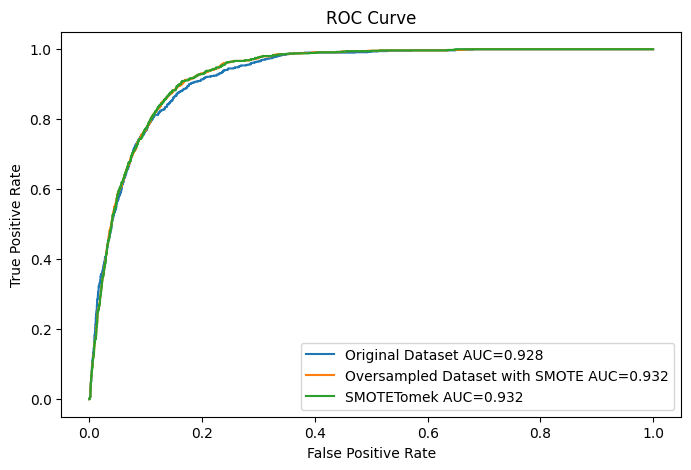

In [99]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', log_reg)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', log_reg)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', log_reg)

In [125]:
print('Train AUROC', compute_auroc(log_reg, X_train, y_train))
print('Test AUROC', compute_auroc(log_reg, X_test, y_test))

Train AUROC 0.9265565618447456
Test AUROC 0.9317701255591416


 - Conclusion: LogisticRegression perform the best score=0.932 on oversampled dataset with SMOTE and SMOTTomek

## KNN

In [100]:
knn = KNeighborsClassifier()

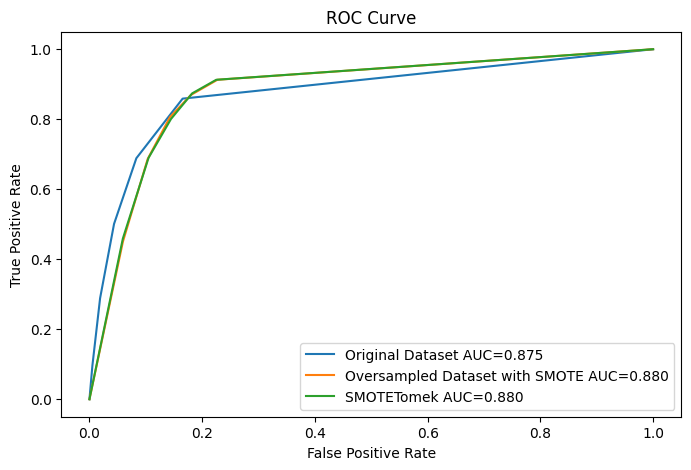

In [101]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', knn)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', knn)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', knn)

#### Searching for the best params for KNN

In [102]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.91


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [103]:
knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11, weights = 'uniform')

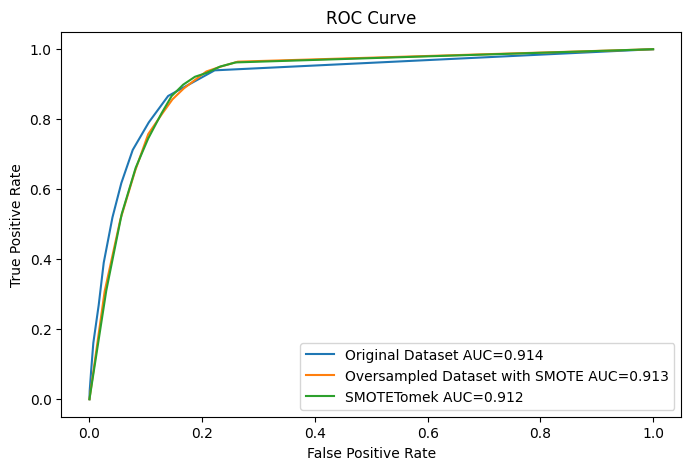

In [106]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', knn_best)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', knn_best)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', knn_best)

In [124]:
print('Train AUROC', compute_auroc(knn_best, X_train, y_train))
print('Test AUROC', compute_auroc(knn_best, X_test, y_test))

Train AUROC 0.9813571907701881
Test AUROC 0.9118843986514542


- Conclusion: KNN performs the best score=0.914 on the original dataset

## Decision Tree

In [107]:
tree = DecisionTreeClassifier()

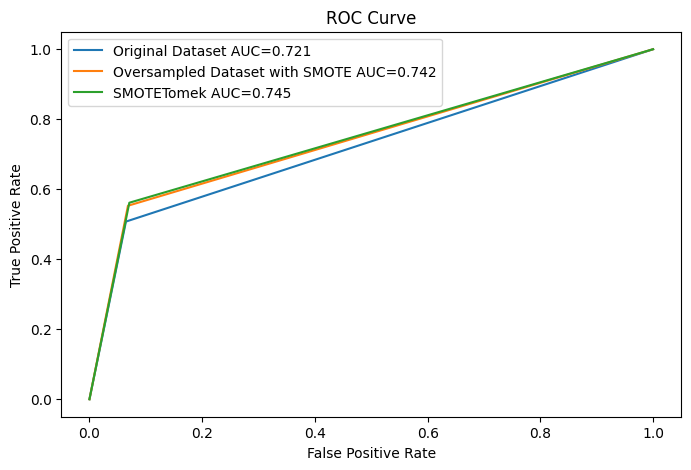

In [108]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', tree)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', tree)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', tree)

In [109]:
## checking for overfitting
tree.fit(X_train, y_train)
train_preds = tree.predict(X_train)
preds = tree.predict(X_test)
print('Train AUC=', auc(y_train, train_preds))
print('Test AUC=', auc(y_test, preds))

Train AUC= 1.0
Test AUC= 0.7252411740558293


- Conclusion: the model DecisionTreeClassifier has been overfitted. So we need to cut the tree depth and find the best params with GridSearchCV or RandomForest

#### Searching for the best params for DecisionTreeClassifier

In [110]:
dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.91


In [111]:
best_dtc = grid_search.best_estimator_

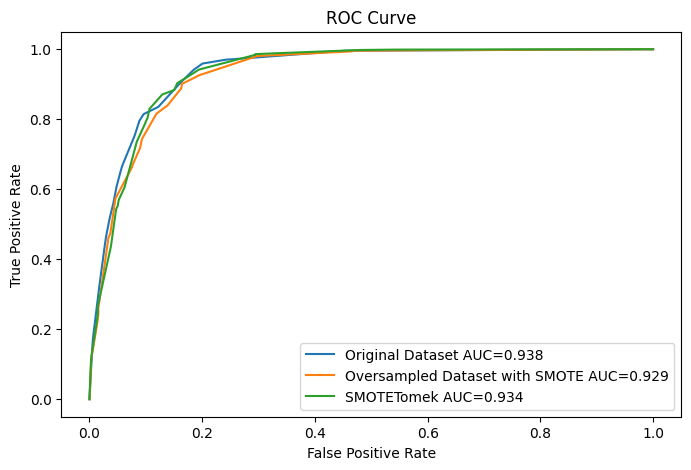

In [112]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', best_dtc)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', best_dtc)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', best_dtc)

In [123]:
print('Train AUROC', compute_auroc(best_dtc, X_train, y_train))
print('Test AUROC', compute_auroc(best_dtc, X_test, y_test))

Train AUROC 0.9325851837660369
Test AUROC 0.9340439238765265


 - Conclusion: the DecisionTreeClassifier performs the best score=0.938 on the original dataset

## XGBoost

In [114]:
def categorise(categorical_cols:list, df):
  for col in categorical_cols:
    df[col] = df[col].astype('category')
  return df

In [115]:
train_inputs = categorise(cat_columns, X_train)
test_inputs = categorise(num_columns, X_test)

In [116]:
xgb_clf = XGBClassifier(
    max_depth=3,
    n_estimators=10,
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda'
)

xgb_clf.fit(X_train, y_train)
train_preds = xgb_clf.predict(X_train)
test_preds = xgb_clf.predict(test_inputs)

print("Train AUROC", roc_auc_score(y_train, train_preds))
print("Val AUROC", roc_auc_score(y_test, test_preds))

Train AUROC 0.6914040753038899
Val AUROC 0.5498169813902571


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


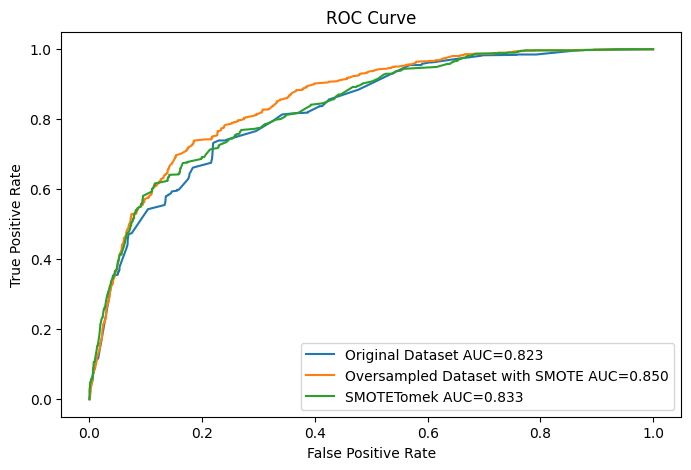

In [117]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', xgb_clf)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', xgb_clf)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', xgb_clf)

In [118]:

# Specifies objective
def objective(model_class, param_space, params, **model_specific_params):
    # Convert hyperopt params to the correct types if necessary
    model_params = {key: int(value) if key in param_space['int_params'] else value for key, value in params.items()}

    # Initialize the model with enable_categorical if using XGBClassifier
    if model_class == XGBClassifier:
        model = model_class(**model_params, enable_categorical=True, **model_specific_params, random_state=42)
    else:
        model = model_class(**model_params, **model_specific_params, random_state=42)

    # Fit the model
    try:
        model.fit(train_inputs, y_train, eval_set=[(test_inputs, y_test)], verbose=False)
    except TypeError:
        model.fit(train_inputs, y_train, eval_set=[(test_inputs, y_test)])

    # Compute the AUROC
    auroc = compute_auroc(model, test_inputs, y_test)

    return {'loss': -auroc, 'status': STATUS_OK}

# Wrapper function for hyperopt for XGB
def hyperopt_objective_XGB(params):
    return objective(XGBClassifier, param_space, params, device='cuda')


# Function to find best hyperparameters
def optimize_hyperopt_params(objective, space, int_params, max_evals):
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=max_evals, trials=Trials())
    # Convert hyperparameter values to final types
    for key in int_params:
      best[key] = int(best[key])

    print("Best hyperparameters: ", best)

    return best

In [119]:
param_space = {
    'params': {
        # The number of boosting rounds (trees) to build
        'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
        # The learning rate, which controls the contribution of each tree to the final model
        'learning_rate': hp.uniform('learning_rate', 0.001, 0.1),
        # The maximum depth of a tree
        'max_depth': hp.quniform('max_depth', 3, 10, 1),
        # Minimum sum of instance weight (hessian) needed in a child
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        # The fraction of samples to be used for building each tree
        'subsample': hp.uniform('subsample', 0.6, 1.0),
        # The fraction of features to be used for building each tree
        'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
        # Minimum loss reduction required to make a further partition on a leaf node of the tree
        'min_split_loss': hp.uniform('min_split_loss', 0, 0.5),
        # L1 regularization term on weights
        'reg_alpha': hp.uniform('reg_alpha', 0.001, 1),
        # L2 regularization term on weights
        'reg_lambda': hp.uniform('reg_lambda', 0.001, 1)
    },
    'int_params': ['n_estimators', 'max_depth', 'min_child_weight']
}

# Find best hyperparameters for XGB Classifier
best = optimize_hyperopt_params(hyperopt_objective_XGB, param_space['params'], param_space['int_params'], max_evals=10)

100%|██████████| 10/10 [00:19<00:00,  1.90s/trial, best loss: -0.8354730231866825]
Best hyperparameters:  {'colsample_bytree': 0.8160437591744788, 'learning_rate': 0.029329807790801358, 'max_depth': 10, 'min_child_weight': 4, 'min_split_loss': 0.04542811457392004, 'n_estimators': 150, 'reg_alpha': 0.9577940022141486, 'reg_lambda': 0.7016148514967597, 'subsample': 0.8194326081432642}


In [120]:
# Final model with the best parameters
final_clf_xgb = XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    min_split_loss=best['min_split_loss'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    random_state=42,
    device='cuda',
    enable_categorical=True
)

final_clf_xgb.fit(X_train, y_train)

print('Train AUROC', compute_auroc(final_clf_xgb, X_train, y_train))
print('Validation AUROC', compute_auroc(final_clf_xgb, X_test, y_test))

Train AUROC 0.9766477129247623
Validation AUROC 0.8354730231866825


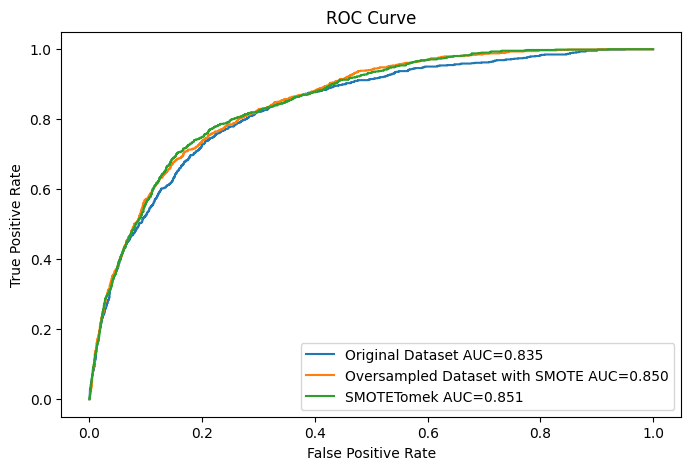

In [121]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, y_train, X_test, y_test, 'Original Dataset', final_clf_xgb)
plot_roc(ax, X_train_smote, y_train_smote, X_test, y_test, 'Oversampled Dataset with SMOTE', final_clf_xgb)
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test, y_test, 'SMOTETomek', final_clf_xgb)

- Conclusion: XGBoost model with tuned hyperparameters performs the best score=0.859 on the oversampled dataset with SMOTE and SMOTETomek